In [424]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable

# Helpers for plotting the trajectories of the weights of the neurons

In [425]:
def plot_trajectories(data_row):
  convergence_neurons_incoming_x = []
  convergence_neurons_incoming_y = []
  convergence_neurons_outgoing = []

  for i in range(0, int(data_row['student size'])):
    neuron_traj_x = np.fromstring(data_row['neuron_' + str(i) + '_traj_x'][0][1:-1], dtype=float, sep=',')
    neuron_traj_y = np.fromstring(data_row['neuron_' + str(i) + '_traj_y'][0][1:-1], dtype=float, sep=',')
    plt.plot(neuron_traj_x, neuron_traj_y)
  
    convergence_neurons_incoming_x.append(neuron_traj_x[-1])
    convergence_neurons_incoming_y.append(neuron_traj_y[-1])

    neuron_a = float(data_row['neuron_' + str(i) + '_a'][0])
    convergence_neurons_outgoing.append(neuron_a)

  teacher_neurons_x = np.fromstring(data_row['teacher_neurons_x'][0][1 : -1], dtype=float, sep=',')
  teacher_neurons_y = np.fromstring(data_row['teacher_neurons_y'][0][1 : -1], dtype=float, sep=',')
  plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")

  plt.scatter(convergence_neurons_incoming_x,
            convergence_neurons_incoming_y,
            c = convergence_neurons_outgoing,
            cmap=matplotlib.cm.jet)
  plt.colorbar()

# Read the data from the .csv file

In [426]:
data = pd.read_csv('experiments_data.csv', float_precision='round_trip')

len(data)

1000

In [427]:
data.head()

,loss,gradient norm,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
0,7.762151e-31,1.512900e-16,5,"[-0.6514537846346138, -0.6613901468723918, -0....","[-0.18499486502349527, -0.17499569685743316, -...","[-0.4924871653015548, -0.5024540176639839, -0....","[-0.4478209455390824, -0.45782150500423524, -0...","[-0.33042139409697746, -0.32040192608532253, -...","[-0.12321484564576601, -0.13317165629139227, -...","[0.9133165346080767, 0.9033023056129078, 0.893...","[-0.14210072267696994, -0.15209691927336091, -...","[0.8773813043769291, 0.8674064077077142, 0.857...","[-0.3901061580047561, -0.40011432188214907, -0...","[0.9023765967521633, 0.8923734851140437, 0.882...","[0.8985326758943212, 0.888549328200647, 0.8786...","[-0.08146624588700624, -0.09148276213940347, -...","[-0.6320223581727991, -0.6220146222724071, -0....","[-0.46955732204498024, -0.4788629582213706, -0...","[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
1,1.141050e-04,4.060677e-10,5,"[0.25902753986908955, 0.24904284296335286, 0.2...","[0.8962326797704556, 0.9061870683382779, 0.915...","[-0.8586567493563299, -0.8486623988356045, -0....","[-0.47261132395471644, -0.4825820061178115, -0...","[0.1558246561988308, 0.14588128862340502, 0.13...","[-0.33255176725246116, -0.3225569850675661, -0...","[-0.41729059817171255, -0.4272726399226728, -0...","[-0.5711813189370029, -0.561193924685258, -0.5...","[-0.7176906578592621, -0.7076961265119293, -0....","[-0.6033631337213354, -0.6133351835050077, -0....","[-0.037621091574681964, -0.027682692873146224,...","[-0.3847866361030847, -0.3747914193398116, -0....","[0.5447934254375777, 0.5347979046937044, 0.524...","[-0.2676555794709, -0.2776532676193942, -0.287...","[-0.90526646287519, -0.8952726096132514, -0.88...","[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
2,1.406676e-32,5.495767e-17,5,"[0.2938811494591882, 0.2838901949095491, 0.273...","[0.25973641861404984, 0.24970927063968004, 0.2...","[-0.6671172651658142, -0.6571482189181184, -0....","[0.6422832982226669, 0.6323364175675436, 0.622...","[0.42277954405314677, 0.43275796861768434, 0.4...","[-0.07098094973996072, -0.06100612968391575, -...","[0.6244432507895041, 0.6344350223482547, 0.644...","[-0.8271803775327384, -0.8171824274750428, -0....","[0.614342217680062, 0.6243168679269107, 0.6341...","[0.48182082569562157, 0.4718443777930093, 0.46...","[-0.8208963187251731, -0.8308653499925115, -0....","[-0.4127978655943836, -0.4028392054564854, -0....","[-0.17762550869422278, -0.167609188789303, -0....","[0.24549847650152112, 0.2555081782225608, 0.26...","[0.11068671047432999, 0.12065188530342981, 0.1...","[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
3,1.546066e-32,2.785131e-17,5,"[0.3244850794760572, 0.3144863990663584, 0.304...","[0.1730601335397981, 0.16307526867184047, 0.15...","[-0.936681500194125, -0.9266886495988869, -0.9...","[0.9236904969391342, 0.9136893427992884, 0.903...","[0.40377262778498224, 0.39382281441864114, 0.3...","[-0.9308086251247442, -0.9208149417707447, -0....","[-0.7464521242901787, -0.7564307992956282, -0....","[0.003187626256278886, -0.006777421164232556, ...","[-0.8460986294507157, -0.8361049106988461, -0....","[0.5510289117407168, 0.5410544171290782, 0.531...","[0.7746646256741603, 0.7846470018882555, 0.794...","[-0.14687090574462935, -0.136878266395576, -0....","[-0.10855191227305117, -0.11852445875255753, -...","[-0.1621753623082901, -0.17211670559951053, -0...","[-0.20459419207217922, -0.1946012857907619, -0...","[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
4,3.115151e-31,6.061996e-17,5,"[-0.2506188156930773, -0.2406361254934707, -0....","[0.38814473226513746, 0.3981734997265581, 0.40...","[0.47661594787602757, 0.466636432381076, 0.456...","[-0.3547220787390164, -0.3447337909021713, -0....","[0.12209538430954003, 0.1121089556863

# Models

A dummy network that receives as input the precomputed incoming and outgoing weights and sets them directly.

In [428]:
torch.set_default_dtype(torch.float64)
class DummyNetwork(nn.Module):
  def __init__(self, D_in, H, D_out, w_in, w_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.

    D_in: input dimension
    H: dimension of hidden layer
    D_out: output dimension of the first layer
    """
    super(DummyNetwork, self).__init__()
    self.linear1 = nn.Linear(D_in, H, bias=False)
    self.linear2 = nn.Linear(H, D_out, bias=False)
    self.linear1.weight = torch.nn.Parameter(w_in)
    self.linear2.weight = torch.nn.Parameter(w_out)
  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and we must
    return a Variable of output data. We can use Modules defined in the
    constructor as well as arbitrary operators on Variables.
    """
    h_sigmoid = torch.sigmoid(self.linear1(x))
    y_pred = self.linear2(h_sigmoid)
    return y_pred

Teacher model

In [429]:
class TeacherNetwork(nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.

    D_in: input dimension
    H: dimension of hidden layer
    D_out: output dimension of the first layer
    """
    super(TeacherNetwork, self).__init__()
    self.linear1 = nn.Linear(D_in, H, bias=False)
    self.linear2 = nn.Linear(H, D_out, bias=False)
    self.linear1.weight = torch.nn.Parameter(torch.transpose(torch.DoubleTensor([[0.6, -0.5, -0.2, 0.1], [0.5, 0.5, -0.6, -0.6]]), 0, 1))
    self.linear2.weight = torch.nn.Parameter(torch.transpose(torch.DoubleTensor([[1], [-1], [1], [-1]]), 0, 1))
  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and we must
    return a Variable of output data. We can use Modules defined in the
    constructor as well as arbitrary operators on Variables.
    """
    h_sigmoid = torch.sigmoid(self.linear1(x))
    y_pred = self.linear2(h_sigmoid)
    return y_pred

# Dataset

In [430]:
D_in, H_teacher, H_student, D_out = 2, 4, 5, 1

def construct_dataset():
  data = []
  for y in np.arange(-5, 5.1, .25):
    for x in np.arange(-5, 5.1, .25):
      data.append([x, y])
  return data

dataset = torch.DoubleTensor(construct_dataset()) 
print(len(construct_dataset()))

1681


# Labels

In [431]:
teacher_model = TeacherNetwork(D_in, H_teacher, D_out)
y_labels = teacher_model(dataset).detach()

# Pytorch-based helper for computing the Hessian

In [432]:
def eval_hessian(loss_grad, model):
  cnt = 0
  for g in loss_grad:
      g_vector = g.contiguous().view(-1) if cnt == 0 else torch.cat([g_vector, g.contiguous().view(-1)])
      cnt = 1
  grad_norm = torch.norm(g_vector)
  l = g_vector.size(0)
  hessian = torch.zeros((l, l), dtype = torch.float64)
  for idx in range(l):
      grad2rd = torch.autograd.grad(g_vector[idx], model.parameters(), create_graph=True)
      cnt = 0
      for g in grad2rd: 
          g2 = g.contiguous().view(-1) if cnt == 0 else torch.cat([g2, g.contiguous().view(-1)])
          cnt = 1
      hessian[idx] = g2
  # Symmetrize the Hessian.
  hessian = (hessian + hessian.T) / 2
  return grad_norm.detach().numpy(), hessian.detach().numpy()

# Selection of high loss points

In [433]:
max_loss_data = data[data['loss'] >= 1e-5]
len(max_loss_data)

426

In [434]:
# max_loss_data.to_csv('experiments_local_min.csv')

## Select the point with minimum eigenvalue (in magnitude)

### Helper for extracting the weights from one data point.

In [435]:
def extract_weights(data_point):
  incoming_weights_x = []
  incoming_weights_y = []
  outgoing_weights = []

  for i in range(0, int(data_point['student size'])):
    neuron_traj_x = np.fromstring(data_point['neuron_' + str(i) + '_traj_x'][1:-1], dtype=float, sep=',')
    neuron_traj_y = np.fromstring(data_point['neuron_' + str(i) + '_traj_y'][1:-1], dtype=float, sep=',')
    incoming_weights_x.append(neuron_traj_x[-1])
    incoming_weights_y.append(neuron_traj_y[-1])

    neuron_traj_out = np.fromstring(data_point['neuron_' + str(i) + '_a'][1:-1], dtype=float, sep=',')

    outgoing_weights.append(neuron_traj_out[-1])

  return incoming_weights_x, incoming_weights_y, outgoing_weights

In [436]:
sample_point = max_loss_data.sample()
sample_point

,loss,gradient norm,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
554,0.000098,1.456077e-09,5,"[0.029438853469671122, 0.03943104624978412, 0....","[0.0845151211773385, 0.09449931162900915, 0.10...","[0.4244643637563562, 0.43444141096843913, 0.44...","[0.9131714780143656, 0.923151530819263, 0.9330...","[0.02840385042721083, 0.038387662608634895, 0....","[0.4001589942359115, 0.4101367416224403, 0.419...","[0.43519416467128, 0.44519534447872217, 0.4551...","[0.5681585436017709, 0.5781098255212015, 0.587...","[0.1700401093699503, 0.18001644104202252, 0.18...","[0.8795288041806852, 0.8695352485000605, 0.859...","[0.7410030065906386, 0.7310398324637591, 0.721...","[-0.7221097008256196, -0.7121341923135196, -0....","[0.14151475097768018, 0.13152562035912851, 0.1...","[0.5015550235608282, 0.4915618444288001, 0.481...","[-0.7009683350228368, -0.6910016451660572, -0....","[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


In [437]:
for idx, sample_point in sample_point.iterrows():
    pass

In [438]:
sample_point['loss']

9.824400349850165e-05

In [439]:
sample_point['gradient norm']

1.456077366509556e-09

In [440]:
incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(sample_point)
print(incoming_weights_x)
print(incoming_weights_y)
print(outgoing_weights)

[0.010757629797588755, 0.8054606105591517, 1.9462998594549623, 1.4579361574868825, -1.418673511576729]
[-0.0025339474620476535, 0.4804371057503569, 1.6275843313069003, -0.9812559069154805, 0.9601993822686231]
[11.570444911846787, 0.4358765290685335, 0.04782891229293919, -5.85261462660909, -6.201535728101241]


In [441]:
teacher_neurons_x = [0.6, -0.5, -0.2, 0.1]
teacher_neurons_y = [0.5, 0.5, -0.6, -0.6]

## Plotting of the neuron point

Text(0, 0.5, 'w2')

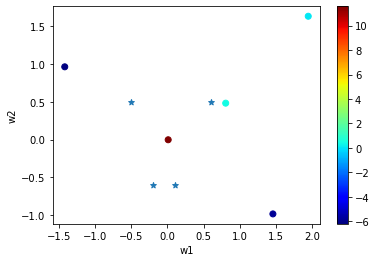

In [442]:
plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")

plt.scatter(incoming_weights_x,
            incoming_weights_y,
            c = outgoing_weights,
            cmap = matplotlib.cm.jet)

plt.colorbar()
plt.xlabel('w1')
plt.ylabel('w2')

In [443]:
# max_loss_data[abs(max_loss_data['w31'] - teacher_neurons_x[0]) == min(abs(max_loss_data['w31'] - teacher_neurons_x[0]) )]
# sample_point = max_loss_data[max_loss_data['smallest_heg'] == min(abs(max_loss_data['smallest_heg']))]

In [444]:


# for index, row in max_loss_data.iterrows():
#   incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(row)

#   plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")
#   plt.scatter(incoming_weights_x,
#             incoming_weights_y,
#             c = outgoing_weights,
#             cmap = matplotlib.cm.jet)

#   plt.colorbar()
#   plt.xlabel('w1')
#   plt.ylabel('w2')


## Pytorch-based eigenvalue computation

In [445]:
w_in = torch.DoubleTensor([[incoming_weights_x[0], incoming_weights_y[0]],
                           [incoming_weights_x[1], incoming_weights_y[1]],
                           [incoming_weights_x[2], incoming_weights_y[2]],
                           [incoming_weights_x[3], incoming_weights_y[3]],
                           [incoming_weights_x[4], incoming_weights_y[4]]])
w_out = torch.DoubleTensor([outgoing_weights])
dummy_model = DummyNetwork(D_in, H_student, D_out, w_in, w_out)
loss_grad = torch.autograd.grad(nn.MSELoss()(dummy_model(dataset), y_labels), dummy_model.parameters(), create_graph=True)
grad_norm, hessian = eval_hessian(loss_grad, dummy_model)
smallest_eigenvalue = np.min(np.linalg.eigvals(hessian))

print('loss at the end: ', nn.MSELoss()(dummy_model(dataset), y_labels))
print('gradient norm at the end: ', grad_norm)
print('smallest eigenvalue at the end: ', smallest_eigenvalue)

loss at the end:  tensor(9.8244e-05, grad_fn=<MseLossBackward>)
gradient norm at the end:  1.456077366509556e-09
smallest eigenvalue at the end:  2.405309439313363e-10


## Smallest eigenvalue using JAX

In [446]:
import jax.numpy as jnp
from jax import nn as jax_nn
from jax.config import config; config.update("jax_enable_x64", True)
jnp.set_printoptions(precision=32)

jnp_inputs = jnp.array(construct_dataset(), dtype=jnp.float64)
jnp_labels = jnp.array(teacher_model(dataset).detach(), dtype=jnp.float64)

def predict(w_in, w_out):
  return w_out @ jnp.transpose(jax_nn.sigmoid(jnp_inputs @ jnp.transpose(w_in)))

w_in = jnp.array([[incoming_weights_x[0], incoming_weights_y[0]],
                  [incoming_weights_x[1], incoming_weights_y[1]],
                  [incoming_weights_x[2], incoming_weights_y[2]],
                  [incoming_weights_x[3], incoming_weights_y[3]],
                  [incoming_weights_x[4], incoming_weights_y[4]]], dtype=jnp.float64)
w_out = jnp.array(outgoing_weights, dtype=jnp.float64)

### Loss in JAX

Loss of the network computed in JAX.

In [447]:
def loss(w):
  w_in = w[0 : 2 * H_student].reshape(D_in, H_student).T
  w_out = w[2 * H_student : ].reshape(1, H_student)
  preds = predict(w_in, w_out).T
  return jnp.mean(jnp.mean(jnp.square(preds - jnp_labels)))
print(loss(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student))))

9.824400349850147e-05


### Hessian in JAX

In [448]:
from jax import jacfwd, jacrev, jit
import jax

def hessian(f):
    return jacfwd(jacrev(f))

H = hessian(loss)(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student)))
H = (H + H.T) / 2

### Eigenvalues in JAX

In [449]:
evals, evectors = jnp.linalg.eigh(H)

print(evals)
smallest_evector = evectors[:, jnp.argmin(evals)]

[2.4053122059143466e-10 3.8025342732490667e-07 3.4331439771679698e-05
 1.4524088424214553e-04 3.2140105200760224e-04 7.7431548301523363e-04
 1.8103889445149088e-03 1.3993360144315540e-02 2.6655205496672555e-02
 6.8017393974100199e-02 6.8968042222945625e-01 2.5309219640493734e+00
 8.5081663020864227e+00 1.4709793471541735e+02 1.5951827710251399e+02]


### Plot smallest eval w.r.t. loss for entire dataset

In [455]:
losses = []
smallest_evals = []

for index, row in data.iterrows():
    incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(row)
    w_in_row = jnp.array([[incoming_weights_x[0], incoming_weights_y[0]],
                  [incoming_weights_x[1], incoming_weights_y[1]],
                  [incoming_weights_x[2], incoming_weights_y[2]],
                  [incoming_weights_x[3], incoming_weights_y[3]],
                  [incoming_weights_x[4], incoming_weights_y[4]]], dtype=jnp.float64)
    w_out_row = jnp.array(outgoing_weights, dtype=jnp.float64)
    H = hessian(loss)(jnp.append(w_in_row.T.reshape(D_in * H_student), w_out_row.reshape(H_student)))
    H = (H + jnp.transpose(H)) / 2.0
    evals, evectors = jnp.linalg.eigh(H)

    evals.sort()
    
    smallest_evals.append(evals[0])
    if evals[0] >= 1e-8 and loss(jnp.append(w_in_row.T.reshape(D_in * H_student), w_out_row.reshape(H_student))) >= 1e-6:
        print(index, loss(jnp.append(w_in_row.T.reshape(D_in * H_student), w_out_row.reshape(H_student))))
    losses.append(loss(jnp.append(w_in_row.T.reshape(D_in * H_student), w_out_row.reshape(H_student))))

8 8.368025624534006e-05
18 8.380062138528419e-05
42 6.224794159624118e-05
46 6.872466655934685e-05
65 8.368025624534002e-05
67 8.368025624534004e-05
71 7.316832781245215e-05
74 6.268626268395804e-05
75 8.368025624533997e-05
81 8.376307418341267e-05
86 7.309242870219874e-05
136 8.37525918459234e-05
150 6.22479415962407e-05
166 6.846796496885735e-05
171 6.846796496885746e-05
178 8.380062138528424e-05
192 8.380062138528423e-05
211 7.787867813255612e-05
232 6.224794159624389e-05
238 7.309242870219874e-05
241 8.368025624534004e-05
249 6.224794159624062e-05
252 6.22479415962406e-05
256 4.4689090165136315e-05
279 8.380062138528419e-05
284 8.375259184592345e-05
293 8.215076701029652e-05
296 6.872466655934694e-05
300 8.157146234378563e-05
306 7.309242870219864e-05
314 7.309242870219868e-05
347 7.739613156188255e-05
354 6.872466655934716e-05
379 7.309242870219876e-05
380 8.368025624534004e-05
383 8.215076701029663e-05
386 6.224794159624073e-05
387 8.380062138528423e-05
388 6.84679649688588e-05
3

Text(0, 0.5, 'Smallest eigenvalue')

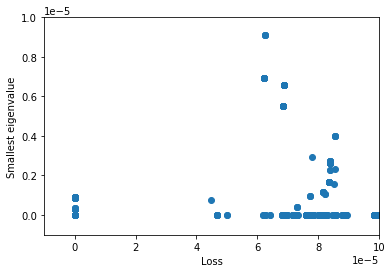

In [451]:
plt.scatter(losses, smallest_evals)
plt.xlim(-1e-5, 1e-4, 4)
plt.ylim(-1e-6, 1e-5)
plt.xlabel('Loss')
plt.ylabel('Smallest eigenvalue')

## Perturbation (based on JAX evectors)

### For one random element

Text(0, 0.5, 'smallest eval')

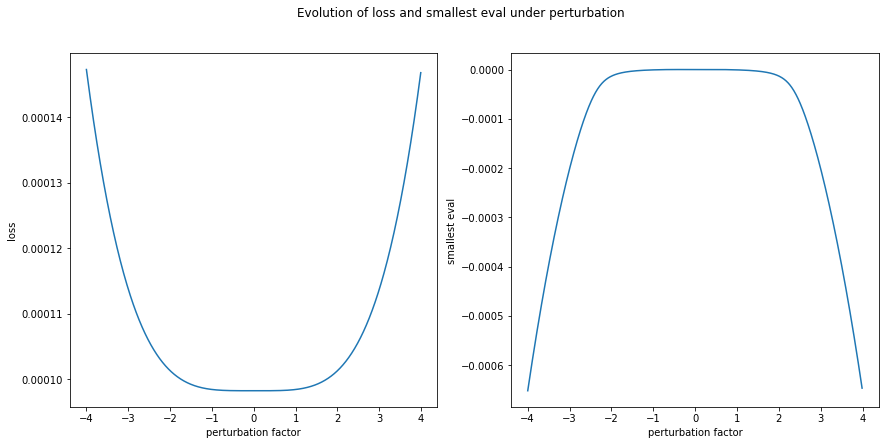

In [452]:
old_loss = loss(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student)))

perturb_lower_bound = -4.0
perturb_upper_bound = 4.0
perturb_step = 0.01

perturb_losses = []
perturb_evals = []

weights = jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student))
for eps in np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step):
  new_weights = weights + eps * smallest_evector
  
  H = hessian(loss)(new_weights)
  H = (H + H.T) / 2
  evals, _ = jnp.linalg.eigh(H)

  perturb_evals.append(min(evals))
  perturb_losses.append(loss(new_weights))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14.5, 6.5)
fig.suptitle('Evolution of loss and smallest eval under perturbation')
ax1.plot(np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step), perturb_losses)
ax1.ticklabel_format(useOffset=False)
ax1.set_xlabel('perturbation factor')
ax1.set_ylabel('loss')

ax2.plot(np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step), perturb_evals)
ax2.set_xlabel('perturbation factor')
ax2.set_ylabel('smallest eval')

### For the entire set of high loss points

In [453]:
# num_saddles = 0
# num_local_minima = 0
# num_total = len(max_loss_data)
# max_diff = -float("inf")
# max_abs_smallest_eval_arr = []

# for index, row in max_loss_data.iterrows():
#   old_loss = row['loss']
#   incoming_weights_x, incoming_weights_y, outgoing_weights = extract_weights(row)

#   w_in = jnp.array([[incoming_weights_x[0], incoming_weights_y[0]],
#                   [incoming_weights_x[1], incoming_weights_y[1]],
#                   [incoming_weights_x[2], incoming_weights_y[2]],
#                   [incoming_weights_x[3], incoming_weights_y[3]],
#                   [incoming_weights_x[4], incoming_weights_y[4]]], dtype=jnp.float64)
#   w_out = jnp.array(outgoing_weights, dtype=jnp.float64)
#   weights = jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student))

#   H = hessian(loss)(jnp.append(w_in.T.reshape(D_in * H_student), w_out.reshape(H_student)))
#   H = (H + H.T) / 2
#   evals, evectors = jnp.linalg.eig(H)

#   # Sanity check
#   for eval in jnp.array([jax.lax.imag(eval) for eval in evals]):
#     assert eval == 0

#   evals = jnp.array([jax.lax.real(eval) for eval in evals])
#   smallest_evector = jnp.array([jax.lax.real(elem) for elem in evectors[:, jnp.argmin(evals)]])

#   max_abs_smallest_eval = -float("inf")

#   for eps in np.arange(perturb_lower_bound, perturb_upper_bound, perturb_step):
#     new_weights = weights + eps * smallest_evector
#     # print(old_loss, loss(new_weights))
#     # print(old_loss - loss(new_weights) - old_loss / 100.0)
#     perturbed_H = hessian(loss)(new_weights)
#     perturbed_H = (perturbed_H + perturbed_H.T) / 2
#     perturbed_evals, _ = jnp.linalg.eig(perturbed_H)

#     max_diff = max(max_diff, old_loss - loss(new_weights))
#     max_abs_smallest_eval = max(abs(min(perturbed_evals)), max_abs_smallest_eval)
#   max_abs_smallest_eval_arr.append(max_abs_smallest_eval)

# print('max diff between the original loss and the computed loss: ', max_diff)
# print(max_abs_smallest_eval_arr)

In [454]:
# print(len(max_abs_smallest_eval_arr))